## Setup
**Linear Discriminant Analysis**

You will implement dimensionality reduction with LDA.  

1). Read iris_dataset.csv (4 features, hence 4 PCs) and remove the first class

2). Find the LDA components

3). Recontruct the dataset (X_hat)

4). Determine the accuracy of X_hat for 1-4 PCs using a LBF SVM classifier (provided)


In [ ]:
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.svm import SVC # This package will help you run the SVM model directly
from sklearn.metrics import accuracy_score # Use accruacy_score to find out accuracy of your model
from sklearn.model_selection import train_test_split

from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Colab Notebooks/HW7/iris_dataset.csv'

# Load data - 150 observations, 4 features, 3 classes
df = pd.read_csv(file_path, header=None)
data = df.values

# Remove the first class and change the class index
X_raw = data[50:,0:4]               # From 150 to 100 samples
y = (np.rint(np.subtract(data[50:,4],2))).astype(int) # From class 2/3 to class 0/1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


SVM classifier (with 20% of the data as the test sets)

In [ ]:
def svm_accuracy(X_hat, y, num_pc):
    X_train, X_test, y_train, y_test = train_test_split(X_hat, y, test_size=0.2)

    clf = SVC(kernel='linear') # Use the linear function of the SVM algorithm
    clf.fit(X_train,y_train) # Train the model using the x_train and y_train
    y_pred = clf.predict(X_test) # Run prediction after training on the testing dataset
    print(num_pc, accuracy_score(y_test,y_pred)) # Print your final accuracy
    return accuracy_score(y_test,y_pred)

LDA (Your code goes here)

In [ ]:
def LDA(X, y, Num_PC):

  dim = len(X[0])
  sum = np.zeros((2,dim))
  means = np.zeros((2,dim))
  count = np.zeros(2)
  Sw = np.zeros((dim,dim))

  for i in range(len(y)):
    sum[y[i]] += X[i]
    count[y[i]] +=1
  means[0] = np.divide(sum[0],count[0])
  means[1] = np.divide(sum[1],count[1])

  Sw = np.zeros((dim,dim))

  for i in range(len(y)):
    diff = X[i]-means[y[i]]
    Sw += np.outer(diff, diff)

  diff = means[0]-means[1]
  Sb = np.outer(diff, diff)

  Fisher = LA.pinv(Sw) @ Sb
  print ("Fisher=", Fisher)
  eigen_values, eigen_vectors = LA.eig(Fisher)

  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]

  sorted_eigenvectors = eigen_vectors[:,sorted_index]

  eigenvector_subset = sorted_eigenvectors[:,0:Num_PC]

  X_reduced = np.dot(X, eigenvector_subset)

  return X_reduced

Fisher= [[-0.0236603  -0.00740292 -0.04688513 -0.02540216]
 [-0.0371149  -0.01161264 -0.07354671 -0.03984729]
 [ 0.04637269  0.01450925  0.09189189  0.04978663]
 [ 0.08240509  0.02578319  0.16329352  0.08847172]]


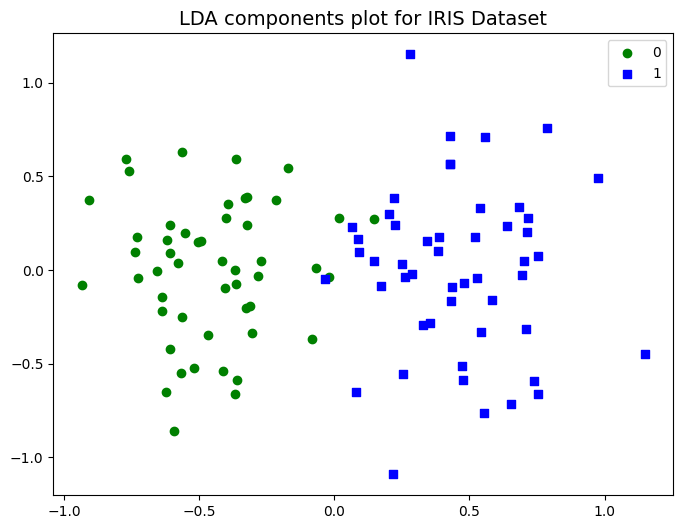

Fisher= [[-0.0236603  -0.00740292 -0.04688513 -0.02540216]
 [-0.0371149  -0.01161264 -0.07354671 -0.03984729]
 [ 0.04637269  0.01450925  0.09189189  0.04978663]
 [ 0.08240509  0.02578319  0.16329352  0.08847172]]
1 1.0
1 0.95
1 0.95
1 0.9
1 1.0
1 0.95
1 0.95
1 1.0
1 1.0
1 1.0
Average accuracy 0.97
Fisher= [[-0.0236603  -0.00740292 -0.04688513 -0.02540216]
 [-0.0371149  -0.01161264 -0.07354671 -0.03984729]
 [ 0.04637269  0.01450925  0.09189189  0.04978663]
 [ 0.08240509  0.02578319  0.16329352  0.08847172]]
2 1.0
2 1.0
2 1.0
2 1.0
2 0.9
2 1.0
2 1.0
2 0.9
2 0.95
2 0.95
Average accuracy 0.97
Fisher= [[-0.0236603  -0.00740292 -0.04688513 -0.02540216]
 [-0.0371149  -0.01161264 -0.07354671 -0.03984729]
 [ 0.04637269  0.01450925  0.09189189  0.04978663]
 [ 0.08240509  0.02578319  0.16329352  0.08847172]]
3 1.0
3 1.0
3 1.0
3 0.95
3 0.9
3 0.95
3 1.0
3 1.0
3 0.95
3 1.0
Average accuracy 0.975
Fisher= [[-0.0236603  -0.00740292 -0.04688513 -0.02540216]
 [-0.0371149  -0.01161264 -0.07354671 -0.03984

In [ ]:
u = [np.mean(X_raw[:,0]), np.mean(X_raw[:,1]), np.mean(X_raw[:,2]), np.mean(X_raw[:,3])]
XM = np.subtract(X_raw,u)  # Subtracting the mean from each feature

X_lda = LDA(XM, y, 2)  # Applying LDA with 2 components

plt.figure(figsize=(8,6))
plt.scatter(X_lda[0:50,0], X_lda[0:50,1], color='green', marker='o', label='0')

# Scatter plot for class 1
plt.scatter(X_lda[50:100,0], X_lda[50:100,1], color='blue', marker='s', label='1')

plt.title("LDA components plot for IRIS Dataset", fontsize=14)
plt.legend()
plt.show()

avg_accuracy_list = []

for i in range(4):
  num_pc = i+1
  X_hat = LDA(XM, y, num_pc)
  avg_accuracy = 0
  for r in range(10):
    avg_accuracy += svm_accuracy(X_hat, y, num_pc)

  avg_accuracy_list.append(avg_accuracy/10)
  print("Average accuracy", avg_accuracy/10)

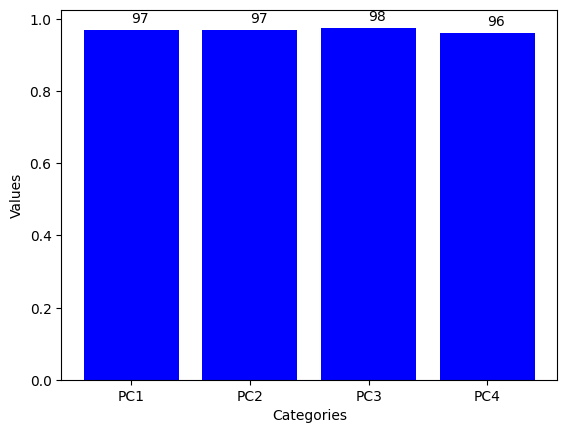

In [ ]:
import matplotlib.pyplot as plt


categories = ['PC1', 'PC2', 'PC3', 'PC4']

plt.bar(categories, avg_accuracy_list, color='blue')
plt.xlabel('Categories')
plt.ylabel('Values')

for i, value in enumerate(avg_accuracy_list):
    plt.text(i, value + 0.02 , str(round(value*100)))

plt.show()